In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Red & White Wine Quality

### Input variables (по результатам физико-химических исследований):
1. `fixed acidity` - фиксированная кислотность, большинство кислот, связанных с вином или фиксированны, или нелетучи (не испаряются легко).
2. `volatile acidity` - изменяемые значения кислотности, количество уксусной кислоты в вине, которое при слишком высоких уровнях может привести к неприятному, уксусному вкусу.
3. `citric acid` - лимонная кислота, найденная в небольших количествах, может добавить "свежесть" и аромат к винам.
4. `residual sugar` - остаточный сахар, количество сахара, оставшегося после остановки брожения, редко можно найти вина с менее чем 1 г/л, и вина с более чем 45 г/л считаются сладкими.
5. `chlorides` - хлориды, это количество соли в вине.
6. `free sulfur dioxide`  - свободный диоксид серы, свободная форма SO2 существует в равновесии между молекулярным SO2 (как растворенный газ) и бисульфит-ионом; предотвращает микробный рост и окисление вина.
7. `total sulfur dioxide` - общий диоксид серы, общее количество диоксида серы свободных и связанных форм S02; в низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрации свободного SO2 более 50 ppm SO2 становится очевидным в носу и вкусе вина.
8. `density` - плотность, близка к плотности воды в зависимости от процентного содержания спирта и сахара.
9. `pH` - водородный показатель, по шкале от 0 (очень кислый) до 14( очень щелочной); большинство вин находятся между 3-4 по шкале рН.
10. `sulphates` - содержание сульфатов, добавка, которая может внести вклад в уровни газа двуокиси серы (S02), который действует как противомикробное и противоокислительное
11. `alcohol` - содержание алкоголя, процент содержания алкоголя в вине

### Output variable (по результатам сенсорного анализа): 
12. `quality`  оценка вина по десятибалльной шкале на основе сенсорного анализа

In [3]:
data = pd.read_csv('winequality-red.csv')

In [14]:
data.head()
data = pd.get_dummies(data)
features = data.columns
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

def linear_regr(target):
    y = data[target]
    x = data.drop(target, axis=1)
    feature_names = x.columns[:]
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x = pd.DataFrame(x, columns=feature_names)
    
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(x)
    mse = mean_squared_error(y_pred, y)
    mae = mean_absolute_error(y_pred, y)
    r2_scr = r2(y_pred, y)
    intercept = lr.intercept_  # свободный член
    _lrcoef = lr.coef_.flatten()
    '''
    print('mse',mse)
    print('mae',mae)
    print('r2',r2_scr)
    print('intercept',intercept)
    '''
    plt.barh(feature_names, _lrcoef)
    plt.title(target)
    plt.xlabel("Коэффициент признака")
    plt.ylabel("Признак")
    plt.show()
    
    
    _arr = np.vstack((feature_names, _lrcoef, abs(_lrcoef))).T
    _rating = pd.DataFrame(_arr, columns=['feature_names', 'lr_coef', 'abs'])
    _rating.sort_values(by=['abs'], ascending=False, inplace=True)
    _rating.reset_index(drop=True, inplace=True)
    _rating.drop('abs', axis=1, inplace=True)
                     
    print('R2 SCORE:', r2_scr)
    print('Признаки по убыванию важности:')
    print(_rating)

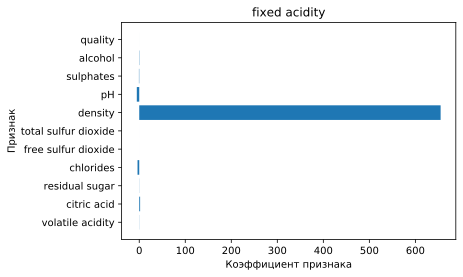

R2 SCORE: 0.8523342554441865
Признаки по убыванию важности:
           feature_names     lr_coef
0                density      654.86
1                     pH    -5.29247
2              chlorides    -3.72467
3            citric acid     1.89353
4              sulphates   -0.691055
5                alcohol    0.547839
6       volatile acidity    0.257315
7         residual sugar   -0.249394
8                quality   0.0233733
9    free sulfur dioxide  0.00910831
10  total sulfur dioxide -0.00642736


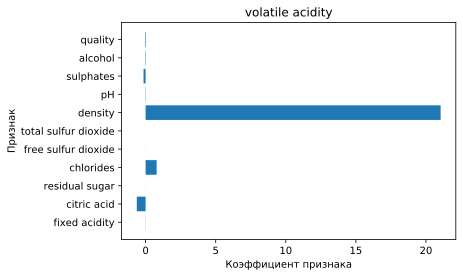

R2 SCORE: -0.13679862452262048
Признаки по убыванию важности:
           feature_names     lr_coef
0                density     21.0464
1              chlorides    0.787104
2            citric acid   -0.627595
3              sulphates   -0.147622
4                quality  -0.0443216
5                alcohol   0.0286698
6                     pH   0.0218021
7          fixed acidity   0.0112531
8    free sulfur dioxide -0.00262879
9         residual sugar -0.00210916
10  total sulfur dioxide  0.00108182


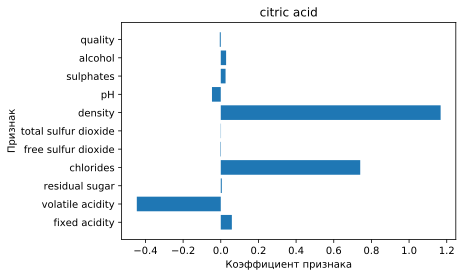

R2 SCORE: 0.5307488440243642
Признаки по убыванию важности:
           feature_names     lr_coef
0                density     1.16756
1              chlorides    0.740597
2       volatile acidity   -0.445919
3          fixed acidity   0.0588376
4                     pH  -0.0467231
5                alcohol   0.0283352
6              sulphates   0.0254704
7         residual sugar  0.00552643
8                quality -0.00530569
9    free sulfur dioxide -0.00237176
10  total sulfur dioxide   0.0012934


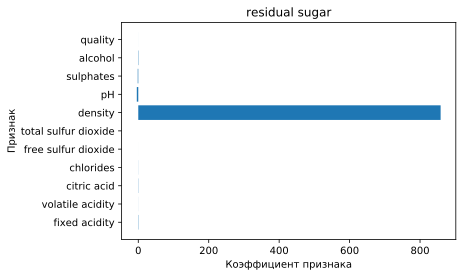

R2 SCORE: -0.4207385551430072
Признаки по убыванию важности:
           feature_names     lr_coef
0                density     858.452
1                     pH    -4.18038
2              sulphates    -1.57058
3                alcohol    0.873049
4          fixed acidity   -0.745995
5            citric acid    0.532001
6              chlorides   -0.217275
7       volatile acidity   -0.144263
8                quality   0.0456893
9    free sulfur dioxide   0.0180949
10  total sulfur dioxide  0.00191118


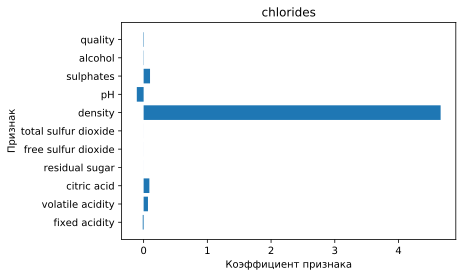

R2 SCORE: -0.9976389022405694
Признаки по убыванию важности:
           feature_names      lr_coef
0                density      4.66102
1                     pH    -0.107015
2              sulphates     0.100474
3            citric acid    0.0902047
4       volatile acidity     0.068117
5          fixed acidity   -0.0140967
6                quality  -0.00663431
7                alcohol  -0.00392785
8    free sulfur dioxide  0.000328244
9         residual sugar -0.000274908
10  total sulfur dioxide -0.000262265


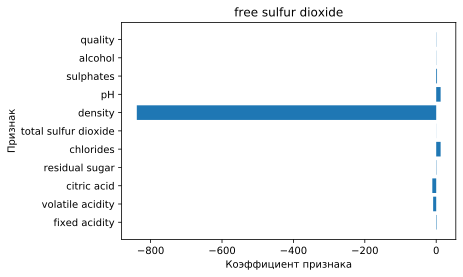

R2 SCORE: -0.03304749180591737
Признаки по убыванию важности:
           feature_names   lr_coef
0                density  -838.659
1              chlorides   12.3625
2                     pH   12.3568
3            citric acid    -10.88
4       volatile acidity  -8.56821
5              sulphates   2.30142
6          fixed acidity   1.29831
7         residual sugar  0.862271
8                quality  0.581438
9                alcohol -0.478644
10  total sulfur dioxide  0.223828


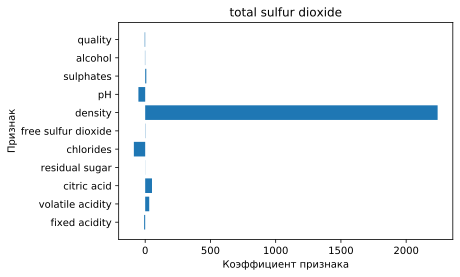

R2 SCORE: 0.17659336411857485
Признаки по убыванию важности:
          feature_names  lr_coef
0               density  2241.14
1             chlorides -86.8162
2           citric acid  52.1483
3                    pH  -51.926
4      volatile acidity  30.9913
5             sulphates  8.62785
6         fixed acidity -8.05234
7               quality -3.82526
8   free sulfur dioxide  1.96727
9               alcohol -1.93779
10       residual sugar  0.80046


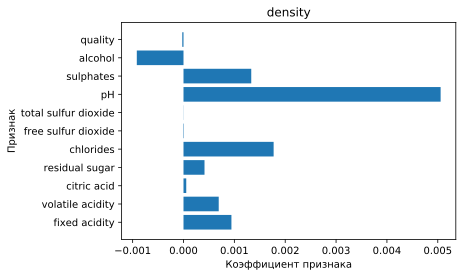

R2 SCORE: 0.8129614428102289
Признаки по убыванию важности:
           feature_names      lr_coef
0                     pH   0.00505594
1              chlorides   0.00177217
2              sulphates    0.0013322
3          fixed acidity  0.000942328
4                alcohol -0.000918233
5       volatile acidity  0.000692508
6         residual sugar  0.000412971
7            citric acid  5.40692e-05
8                quality -2.40655e-05
9    free sulfur dioxide -8.46643e-06
10  total sulfur dioxide  2.57415e-06


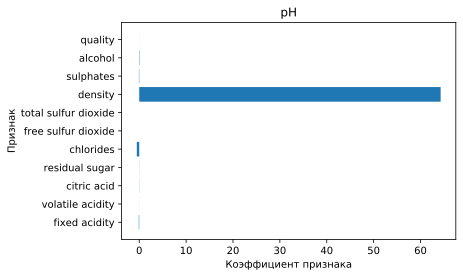

R2 SCORE: 0.5725603094064227
Признаки по убыванию важности:
           feature_names     lr_coef
0                density     64.2945
1              chlorides   -0.517416
2          fixed acidity  -0.0968466
3                alcohol    0.073628
4              sulphates  -0.0700323
5            citric acid  -0.0275153
6         residual sugar  -0.0255736
7       volatile acidity  0.00912257
8                quality -0.00707957
9    free sulfur dioxide  0.00158632
10  total sulfur dioxide -0.00075844


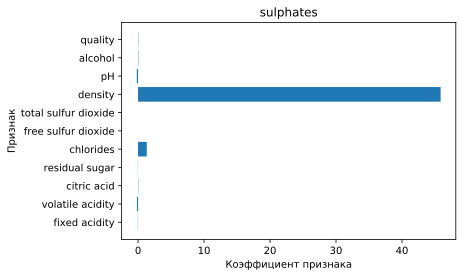

R2 SCORE: -1.052184186954853
Признаки по убыванию важности:
           feature_names      lr_coef
0                density      45.8549
1              chlorides      1.31491
2                     pH    -0.189559
3       volatile acidity    -0.167192
4                alcohol    0.0525652
5                quality    0.0424492
6            citric acid    0.0405999
7          fixed acidity   -0.0342281
8         residual sugar   -0.0260064
9    free sulfur dioxide    0.0007997
10  total sulfur dioxide  0.000341102


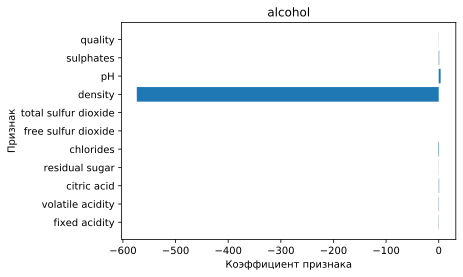

R2 SCORE: 0.5533518951474639
Признаки по убыванию важности:
           feature_names     lr_coef
0                density    -573.634
1                     pH     3.61704
2              sulphates    0.954033
3              chlorides   -0.932957
4            citric acid    0.819747
5       volatile acidity    0.589326
6          fixed acidity     0.49248
7         residual sugar    0.262376
8                quality    0.232221
9    free sulfur dioxide -0.00301863
10  total sulfur dioxide -0.00139044


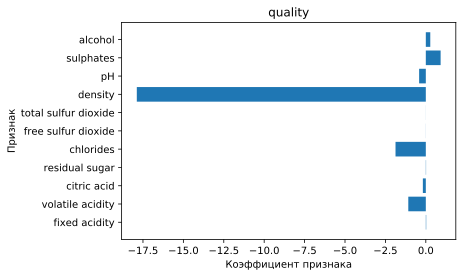

R2 SCORE: -0.7735273237433191
Признаки по убыванию важности:
           feature_names     lr_coef
0                density    -17.8812
1              chlorides    -1.87423
2       volatile acidity    -1.08359
3              sulphates    0.916334
4                     pH   -0.413653
5                alcohol    0.276198
6            citric acid   -0.182564
7          fixed acidity   0.0249906
8         residual sugar   0.0163313
9    free sulfur dioxide  0.00436133
10  total sulfur dioxide -0.00326458


In [89]:
for targ in data.columns:
    linear_regr(targ)

# проверить все регрессии через трейн тест сплит!

# помучаться с отрицательными r2

# попробовать Lasso И Ridge

In [13]:
#sns.jointplot(x=feature_x, y=feature_y, data=data, kind='scatter')

In [136]:
def show_describe(ser):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(ser, ax=axs[0])
    sns.distplot(ser, ax=axs[1],bins=18)
    plt.show()

In [138]:
#plt.scatter(data['chlorides'],data['total_sulfur_dioxide'],c=data['style_red'])

In [139]:
#from statsmodels.graphics.gofplots import qqplot
#qqplot(data['pH'], line='s')
#plt.title('График квантилей (Quantile-Quantile plot)')
#plt.show()

In [140]:
from scipy import stats

def kstest(ser):
    cdf = stats.norm(loc=ser.mean(), scale=ser.std(ddof=1)).cdf
    D, pval = stats.kstest(rvs=ser, cdf=cdf)
    return D, pval

for feature in features:
    print(feature, kstest(data[feature][:1598]))

fixed acidity (0.11059040268688569, 1.7749786900072785e-17)
volatile acidity (0.05454369092607736, 0.00014247213646478794)
citric acid (0.08386720500044803, 3.161680381660414e-10)
residual sugar (0.2609780549830206, 1.6431704124047163e-96)
chlorides (0.2596663920253275, 1.5632521701407152e-95)
free sulfur dioxide (0.11157595450298574, 8.777104080856812e-18)
total sulfur dioxide (0.12080312882807309, 8.847501269578166e-21)
density (0.044789777959281296, 0.0031819174180225942)
pH (0.04015394142906992, 0.011245356131741064)
sulphates (0.12455308233318008, 4.572815602650671e-22)
alcohol (0.12158823093347881, 4.794490955932156e-21)
quality (0.24996969639609473, 1.8373363267940597e-88)


In [143]:
kstest(data['pH'])

(0.04036845419707158, 0.010604884802448568)

In [144]:
def compare_norm_distplots(sample, size=None):
    if not size:
        size = sample.size
    sns.distplot(sample)
    a = sample.mean()
    std = sample.std(ddof=1)
    x = np.linspace()sample.std(ddof=1)
    sns.distplot(stats.norm(loc=sample.mean(), scale=sample.std(ddof=1)).rvs(size=size))

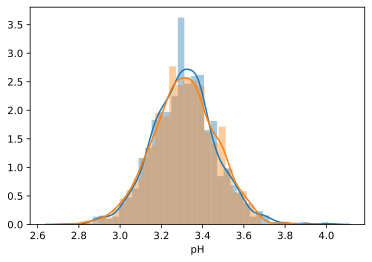

In [145]:
compare_norm_distplots(data['pH'])